# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from random import uniform
from scipy.stats import linregress
from scipy import stats


# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [4]:
cities

['mehran',
 'busselton',
 'bulgan',
 'bethel',
 'samusu',
 'mar del plata',
 'isangel',
 'tuktoyaktuk',
 'kirakira',
 'meulaboh',
 'rikitea',
 'nalut',
 'riohacha',
 'taolanaro',
 'pacific grove',
 'ati',
 'anadyr',
 'avarua',
 'souillac',
 'punta arenas',
 'orgun',
 'mataura',
 'east london',
 'inuvik',
 'san patricio',
 'nikolskoye',
 'puerto escondido',
 'bandarbeyla',
 'hilo',
 'castro',
 'bardiyah',
 'hermanus',
 'vaini',
 'dakar',
 'luba',
 'katsuura',
 'tiznit',
 'mount gambier',
 'cape town',
 'gamba',
 'altay',
 'payson',
 'tezu',
 'erbaa',
 'qaanaaq',
 'maraba',
 'bluff',
 'thompson',
 'khatanga',
 'albany',
 'port blair',
 'esperance',
 'ushuaia',
 'cabo san lucas',
 'omboue',
 'faanui',
 'arraial do cabo',
 'rodrigues alves',
 'port macquarie',
 'catalina',
 'mrirt',
 'beloha',
 'wanning',
 'hof',
 'morondava',
 'carnarvon',
 'shache',
 'constitucion',
 'abha',
 'kapaa',
 'neiafu',
 'kuche',
 'itoman',
 'kamenka',
 'barentsburg',
 'arman',
 'georgetown',
 'xai-xai',
 'naze'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [5]:
# Set up the url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=ad86d236d53d3741491f9b7f50676e8e&units=imperial&q=


In [6]:
#creating lists to store extracted values per city
city_name = []
country = []
date = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []
city_id = []

#setting the counter values
record = 0

print("Beginning Data Retrieval")

print("--------------------------------")

#creating loop to extract values per city and add them to the lists above
for city in cities:
   
    try:
        response = requests.get(f"{query_url}{city}").json()
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        city_record = response["name"]
        city_id = response["id"]
        
        #creating an if statment to print the 
        if record > 600:
            break

        else:
            record += 1
            city_name.append(response["name"])
            
        print(f"The city is {city_record} and the city id is {city_id}.")
        
        #using time.sleep to create time delay
        time.sleep(3)
              
    except :
              print("City not found. Skipping...")
              
    continue

print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")


Beginning Data Retrieval
--------------------------------
The city is Mehrān and the city id is 124291.
The city is Busselton and the city id is 2075265.
The city is Bulgan and the city id is 2032201.
The city is Bethel and the city id is 5282297.
City not found. Skipping...
The city is Mar del Plata and the city id is 3430863.
The city is Isangel and the city id is 2136825.
The city is Tuktoyaktuk and the city id is 6170031.
The city is Kirakira and the city id is 2178753.
The city is Meulaboh and the city id is 1214488.
The city is Rikitea and the city id is 4030556.
The city is Nālūt and the city id is 2214432.
The city is Riohacha and the city id is 3670745.
City not found. Skipping...
The city is Pacific Grove and the city id is 5380437.
The city is Ati and the city id is 2436400.
The city is Anadyr and the city id is 2127202.
The city is Avarua and the city id is 4035715.
The city is Souillac and the city id is 933995.
The city is Punta Arenas and the city id is 3874787.
City not

The city is Lubao and the city id is 1705441.
The city is Pedernales and the city id is 3495137.
The city is Puerto Ayora and the city id is 3652764.
The city is Belaya Gora and the city id is 2126785.
The city is Chui and the city id is 3443061.
The city is Aswān and the city id is 359792.
The city is Manyana and the city id is 933416.
The city is Morris and the city id is 5101405.
The city is Nyurba and the city id is 2018735.
The city is Cidreira and the city id is 3466165.
The city is Bredasdorp and the city id is 1015776.
The city is Tres Arroyos and the city id is 3833859.
The city is Lompoc and the city id is 5367788.
The city is Ugoofaaru and the city id is 1337619.
The city is Turukhansk and the city id is 1488903.
The city is Smithers and the city id is 6149996.
The city is Pisco and the city id is 3932145.
The city is Nanortalik and the city id is 3421765.
The city is Sechura and the city id is 3691954.
The city is Hong Kong and the city id is 1819729.
The city is Harnai and

The city is Russkiy Kameshkir and the city id is 500400.
The city is Meadow Lake and the city id is 5478673.
The city is Itarema and the city id is 3393692.
The city is Tongliao and the city id is 2034400.
The city is Oyem and the city id is 2396646.
The city is Svarstad and the city id is 7626348.
The city is Atambua and the city id is 1651103.
The city is Suntar and the city id is 2015913.
The city is Mossamedes and the city id is 3347019.
The city is Kenai and the city id is 5866063.
The city is Igbon and the city id is 1711277.
The city is Qaqortoq and the city id is 3420846.
The city is Sablé-sur-Sarthe and the city id is 2982076.
The city is Río Gallegos and the city id is 3838859.
The city is São João da Barra and the city id is 3448903.
City not found. Skipping...
The city is Urucará and the city id is 3385670.
The city is Touros and the city id is 3386213.
The city is Kępno and the city id is 3096338.
City not found. Skipping...
The city is Chapais and the city id is 5919850.


The city is Itaituba and the city id is 3397967.
The city is Samarai and the city id is 2132606.
The city is Mājalgaon and the city id is 1263684.
The city is Hitiaa and the city id is 4034402.
The city is Almaznyy and the city id is 582447.
The city is Dvurechensk and the city id is 1507059.
The city is Lodja and the city id is 211647.
The city is Arrondissement de Brive-la-Gaillarde and the city id is 3029973.
The city is Nuuk and the city id is 3421319.
The city is Srednekolymsk and the city id is 2121025.
The city is São Félix do Xingu and the city id is 3388847.
The city is Alekseyevka and the city id is 582956.
The city is La Asuncion and the city id is 3480908.
The city is Hirara and the city id is 1862505.
The city is Alta Floresta and the city id is 6316343.
The city is Turaif and the city id is 101312.
City not found. Skipping...
The city is Andenes and the city id is 3163146.
The city is Laas and the city id is 3175096.
The city is Chingirlau and the city id is 610091.
The c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a data frame from the data
weather_dict = { #key on left, right side is values
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Wind Speed": wind
}

# Put data into data frame
weather_data_df = pd.DataFrame(weather_dict)

# Push the new Data Frame to a new CSV file
weather_data_df.to_csv("../weather_data.csv",
                  encoding="utf-8", index=False, header=True)

# Display the new data frame
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mehrān,0,IR,1600977165,28,33.12,46.16,68.00,2.24
1,Busselton,91,AU,1600977168,54,-33.65,115.33,55.00,18.05
2,Bulgan,100,MN,1600977172,77,48.81,103.53,48.22,2.73
3,Bethel,1,US,1600977175,47,41.37,-73.41,75.99,8.05
4,Mar del Plata,90,AR,1600977178,93,-38.00,-57.56,48.20,10.29


In [8]:
#perform count on data frame, to make sure all columns are filled
weather_data_df.count()

City          578
Cloudiness    578
Country       578
Date          578
Humidity      578
Lat           578
Lng           578
Max Temp      578
Wind Speed    578
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_data_df[weather_data_df["Humidity"]>100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [10]:
#  Get the indices of cities that have humidity over 100%.
weather_data_df = weather_data_df.loc[(weather_data_df["Humidity"] < 100)]
weather_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mehrān,0,IR,1600977165,28,33.12,46.16,68.00,2.24
1,Busselton,91,AU,1600977168,54,-33.65,115.33,55.00,18.05
2,Bulgan,100,MN,1600977172,77,48.81,103.53,48.22,2.73
3,Bethel,1,US,1600977175,47,41.37,-73.41,75.99,8.05
4,Mar del Plata,90,AR,1600977178,93,-38.00,-57.56,48.20,10.29
...,...,...,...,...,...,...,...,...,...
573,Harper,100,LR,1600979079,89,4.38,-7.72,76.26,9.84
574,Oskarshamn,20,SE,1600979082,90,57.26,16.45,51.01,6.44
575,Filingué,13,NE,1600979085,30,14.35,3.32,95.68,6.26
576,Alpena,75,US,1600978953,82,45.06,-83.43,62.60,8.05


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = weather_data_df.dropna(how='any')
clean_city_data_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

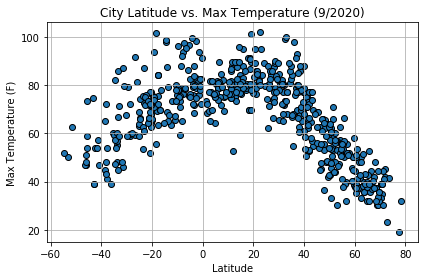

In [12]:
# Plot the graph
plt.scatter(lat, temp, marker="o", facecolors="tab:blue", edgecolors="black")

# Setting the title and axises 
plt.title("City Latitude vs. Max Temperature (9/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add in a grid for the chart
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../Images/city_lat_vs_max_temp.png")
plt.show()

## Latitude vs. Humidity Plot

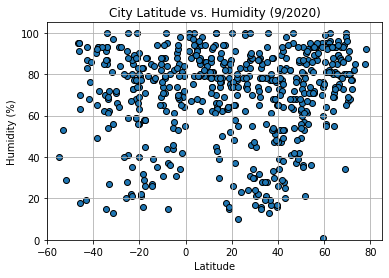

In [13]:
# Plot the graph
plt.scatter(lat, humidity, marker="o", facecolors="tab:blue", edgecolors="black")

# Setting the title and axises 
plt.title("City Latitude vs. Humidity (9/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add in a grid for the chart
plt.grid()

# Setting graph limits
plt.xlim(-60, 85)
plt.ylim(0, 105)

# Save our graph and show the grap
#plt.tight_layout()
plt.savefig("../Images/city_lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

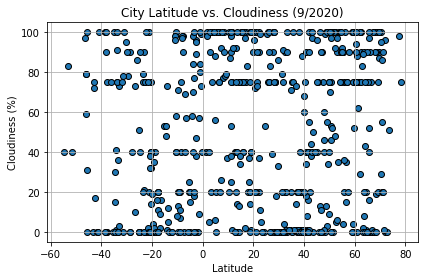

In [14]:
# Plot the graph
plt.scatter(lat, cloudiness, marker="o", facecolors="tab:blue", edgecolors="black")

# Setting the title and axises 
plt.title("City Latitude vs. Cloudiness (9/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add in a grid for the chart
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../Images/city_lat_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

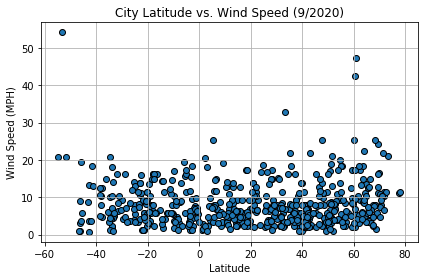

In [15]:
# Plot the graph
plt.scatter(lat, wind, marker="o", facecolors="tab:blue", edgecolors="black")

# Setting the title and axises 
plt.title("City Latitude vs. Wind Speed (9/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

# Add in a grid for the chart
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../Images/city_lat_vs_wind_speed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R Val is 0.694055871357037


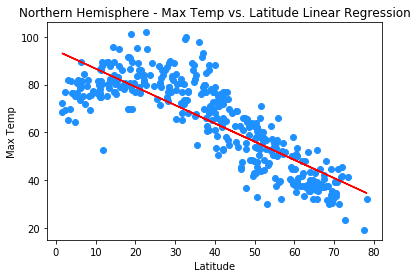

In [16]:
north_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(north_hem['Lat'], north_hem['Max Temp'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R Val is 0.694055871357037


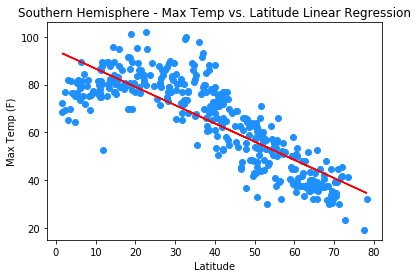

In [17]:
south_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(south_hem['Lat'], south_hem['Max Temp'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Val is 0.00679787383915855


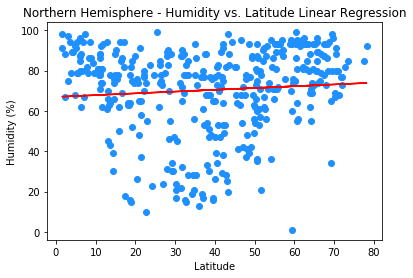

In [18]:
north_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(north_hem['Lat'], north_hem['Humidity'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

x_values = north_hem['Lat']
y_values = north_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Val is 0.00679787383915855


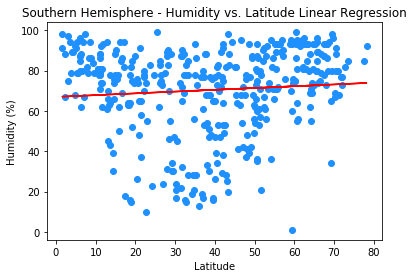

In [19]:
south_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(south_hem['Lat'], south_hem['Humidity'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

x_values = south_hem['Lat']
y_values = south_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Val is 0.00044310179247288993


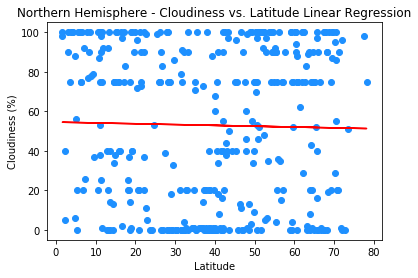

In [20]:
north_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(north_hem['Lat'], north_hem['Cloudiness'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Val is 0.00044310179247288993


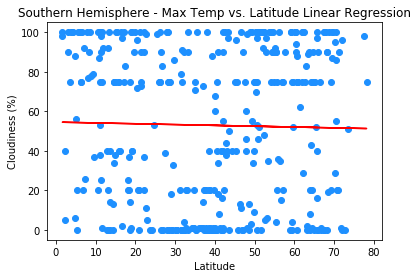

In [21]:
south_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(south_hem['Lat'], south_hem['Cloudiness'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Val is 0.02084202630425654


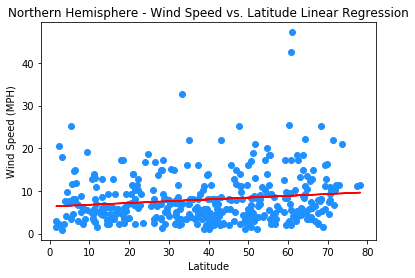

In [22]:
north_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(north_hem['Lat'], north_hem['Wind Speed'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Val is 0.02084202630425654


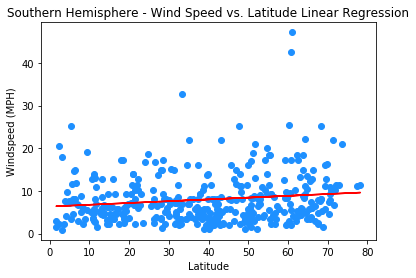

In [23]:
south_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(south_hem['Lat'], south_hem['Wind Speed'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Windspeed (MPH)')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")